In [ ]:
# 一、数据的导入和预处理

In [1]:
# 导入第三方包
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
# 数据读取
income = pd.read_excel(r'd:\temp\Jupyter\income.xlsx')

In [2]:
income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [37]:
income.shape[1]

13

In [7]:
income.age.isnull().sum()
income['age'].isnull().sum()

0

In [4]:
# 查看数据集是否存在缺失值
income.apply(lambda x:np.sum(x.isnull()))

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

居民的收入数据集中有3个变量存在数值缺失，分别是居民的工作类型、职业和国籍。缺失值的存在一般都会影响分析或建模的结果，所以需要对缺失数值做相应
的处理。
处理有三种方式：

一是删除法，即将存在缺失的观测进行删除，如果缺失比例非常小，则删除法是比较合理的，反之，删除比例比较大的缺失值将会丢失一些有用的信息；

二是替换法，即使用一个常数对某个变量的缺失值进行替换，如果缺失的变量是离散型，则可以考虑用众数替换缺失值，如果缺失的变量是数值型，则可以考虑使用均值或中位数替换缺失值；

三是插补法，即运用模型方法，基于未缺失的变量预测缺失变量的值，如常见的回归插补法、多重插补法、拉格朗日插补法等。

In [8]:
# 缺失值处理
income.fillna(value = {'workclass':income.workclass.mode()[0],
                              'occupation':income.occupation.mode()[0],
                              'native-country':income['native-country'].mode()[0]}, inplace = True)
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
income.apply(lambda x:np.sum(x.isnull()))

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

# 二、数据的探索性分析

目的是了解数据背后的特征，如数据的集中趋势、离散趋势、数据形状和变量间的关系等。

首先，需要知道每个变量的基本统计值，如均值、中位数、众数等，只有了解了所需处理的数据特征，才能做到“心中有数”。

In [10]:
income.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
income.describe(include =[ 'object'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14976,5983,13193,27816,21790,29753,24720


其中描述当中包含每个变量非缺失观测的数量（count）、不同离散值的个数（unique）、出现频次最高的离散值（top）和最高频次数（freq）。例如：以受教育水平变量为例，一共有16种不同的教育水平；3万多居民中，高中毕业的学历是出现最多的，一共有10 501名。

In [12]:
income.describe(include =[ 'number'])

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


数据的分布形状（如偏度、峰度等）可以通过可视化的方法进行展现，这里仅以被调
查居民的年龄和每周工作小时数为例，绘制各自的分布形状图

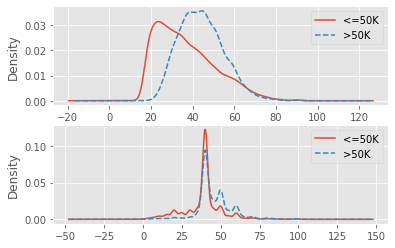

In [13]:
# 导入绘图模块
import matplotlib.pyplot as plt
# 设置绘图风格
plt.style.use('ggplot')
# 设置多图形的组合
fig, axes = plt.subplots(2, 1)
# 绘制不同收入水平下的年龄核密度图
income.age[income.income == ' <=50K'].plot(kind = 'kde', label = '<=50K', ax = axes[0], legend = True, linestyle = '-')
income.age[income.income == ' >50K'].plot(kind = 'kde', label = '>50K', ax = axes[0], legend = True, linestyle = '--')
# 绘制不同收入水平下的周工作小时数和密度图
income['hours-per-week'][income.income == ' <=50K'].plot(kind = 'kde', label = '<=50K', ax = axes[1], legend = True, linestyle = '-')
income['hours-per-week'][income.income == ' >50K'].plot(kind = 'kde', label = '>50K', ax = axes[1], legend = True, linestyle = '--')
# 显示图形
plt.show()

第一幅图展现的是，在不同收入水平下，年龄的核密度分布图，对于年收入超过5万美元的居民来说，他们的年龄几乎呈现正态分布，而收入低于5万美元的居民，年龄呈现右偏特征，即年龄偏大的居民人数要比年龄偏小的人数多；第二幅图展现了不同收入水平下，周工作小时数的核密度图，很明显，两者的分布趋势非常相似，并且出现局部峰值。

也可以针对离散型变量，对比居民的收入水平高低在性别、种族状态、家庭关
系等方面的差异，进而可以发现这些离散变量是否影响收入水平

In [14]:
# 构造不同收入水平下各种族人数的数据
race = pd.DataFrame(income.groupby(by = ['race','income']).aggregate(np.size).loc[:,'age'])
race

age
race                income       
 Amer-Indian-Eskimo  <=50K    275
                     >50K      36
 Asian-Pac-Islander  <=50K    763
                     >50K     276
 Black               <=50K   2737
                     >50K     387
 Other               <=50K    246
                     >50K      25
 White               <=50K  20699
                     >50K    7117

In [15]:
# 重设行索引
race = race.reset_index()
race

,race,income,age
0,Amer-Indian-Eskimo,<=50K,275
1,Amer-Indian-Eskimo,>50K,36
2,Asian-Pac-Islander,<=50K,763
3,Asian-Pac-Islander,>50K,276
4,Black,<=50K,2737
5,Black,>50K,387
6,Other,<=50K,246
7,Other,>50K,25
8,White,<=50K,20699
9,White,>50K,7117


In [16]:
# 变量重命名
race.rename(columns={'age':'counts'}, inplace=True)

In [18]:
# 排序
race.sort_values(by = ['race','counts'], ascending=False, inplace=True)

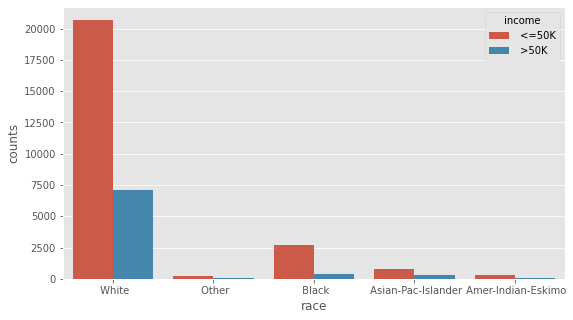

In [19]:
# 设置图框比例，并绘图
plt.figure(figsize=(9,5))
sns.barplot(x="race", y="counts", hue = 'income', data=race)
plt.show()

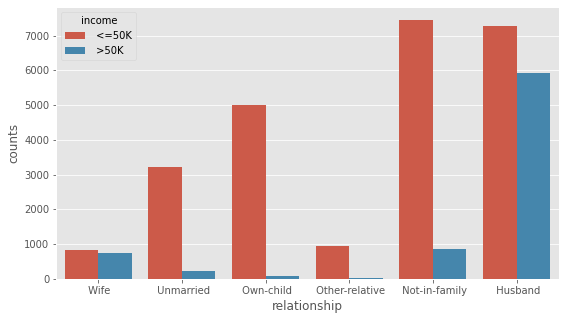

In [20]:
# 构造不同收入水平下各家庭关系人数的数据
relationship = pd.DataFrame(income.groupby(by = ['relationship','income']).aggregate(np.size).loc[:,'age'])
relationship = relationship.reset_index()
relationship.rename(columns={'age':'counts'}, inplace=True)
relationship.sort_values(by = ['relationship','counts'], ascending=False, inplace=True)
plt.figure(figsize=(9,5))
sns.barplot(x="relationship", y="counts", hue = 'income', data=relationship)
plt.show()

# 三、数据建模

# 1、对离散变量进行编码

由于收入数据集中有很多离散型变量，这样的字符变量是不能直接用于建模的，需要对这些变量进行重编码，关于重编码的方法有多种，如将字符型的值转换为整数型的值、哑变量处理（0-1变量）、One-Hot热编码（类似于哑变量）等。在本案例中，将采用“字符转数值”的方法对离散型变量进行重编码。

In [21]:
# 离散变量的重编码
for feature in income.columns:
    if income[feature].dtype == 'object':
        income[feature] = pd.Categorical(income[feature]).codes
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [22]:
income.dtypes

age               int64
workclass          int8
fnlwgt            int64
education          int8
education-num     int64
marital-status     int8
occupation         int8
relationship       int8
race               int8
sex                int8
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country     int8
income             int8
dtype: object

所有的字符型变量都变成了整数型变量，如workclass、education、marital-status等，接下来就基于这个处理好的数据集对收入水平income进行预测。

在原本的居民收入数据集中，关于受教育程度的有两个变量，一个是education（教育水平），另一个是education-num（受教育时长），而且这两个变量的值都是一一对应的，只不过一个是字符型，另一个是对应的数值型，如果将这两个变量都包含在模型中的话，就会产生信息的冗余。其中该文件当中有fnlwgt变量代表的是一种序号，其对收入水平的高低并没有实际意义。
故为了避免冗余信息和无意义变量对模型的影响，考虑将education变量和fnlwgt变量从数据集中删除。

In [23]:
# 删除变量
income.drop(['education','fnlwgt'], axis = 1, inplace = True)
income.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


上面就是经处理“干净”的数据集，所要预测的变量就是income，该变量是二元变量，对其预测的实质就是对年收入水平的分类（一个新样本进来，通过分类模型，可以将该样本分为哪一种收入水平）

关于分类模型有很多种，如Logistic模型、决策树、K近邻、朴素贝叶斯模型、支持向量机、随机森林、梯度提升树GBDT模型等。本案例将对比使用K近邻和GBDT两种分类器，因为通常情况下，都会选用多个模型作为备选，通过对比才能得知哪种模型可以更好地拟合数据。

# 2、拆分数据集

基于上面的“干净”数据集，需要将其拆分为两个部分，一部分用于分类器模型的构建，另一部分用于分类器模型的评估，这样做的目的是避免分类器模型过拟合或欠拟合。如果模型在训练集上表现很好，而在测试集中表现很差，则说明分类器模型属于过拟合状态；如果模型在训练过程中都不能很好地拟合数据，那说明模型属于欠拟合状态。通常情况下，会把训练集和测试集的比例分配为75%和25%。

In [24]:
# 数据拆分
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(income.loc[:,'age':'native-country'], 
                                                    income['income'], train_size = 0.75, 
                                                    random_state = 1234)
print('训练数据集共有%d条观测' %X_train.shape[0])
print('测试数据集共有%d条观测' %X_test.shape[0])

训练数据集共有24420条观测
测试数据集共有8141条观测


结果显示，运用随机抽样的方法，将数据集拆分为两部分，其中训练数据集包含24 420条样本，测试数据集包含8 141条样本，下面将运用拆分好的训练数据集开始构建K近邻和GBDT两种分类器。

# 3、默认参数的模型构建

In [25]:
# 导入k近邻模型的类
from sklearn.neighbors import KNeighborsClassifier
# 构建k近邻模型
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
print(kn)

KNeighborsClassifier()


首先，针对K近邻模型，这里直接调用sklearn子模块neighbors中的KNeighborsClassifier类，并且使用模型的默认参数，即让K近邻模型自动挑选最佳的搜寻近邻算法（algorithm='auto'）、使用欧氏距离公式计算样本间的距离（p=2）、指定未知分类样本的近邻个数5（n_neighbors=5）而且所有近邻样本的权重都相等（weights='uniform'）。

In [26]:
# 导入GBDT模型的类
from sklearn.ensemble import GradientBoostingClassifier
# 构建GBDT模型
gbdt = GradientBoostingClassifier()
gbdt.fit(X_train, y_train)
print(gbdt)

GradientBoostingClassifier()


针对GBDT模型，可以调用sklearn子模块ensemble中的GradientBoostingClassifier类， 同 样 先 尝 试 使 用 该 模 型 的 默 认 参 数， 即 让 模 型 的 学 习 率 （迭 代 步 长） 为0.1（learning_rate=0.1）、损失函数使用的是对数损失函数（loss='deviance'）、生成100棵基础决策树（n_estimators=100），并且每棵基础决策树的最大深度为3（max_depth=3），中间节点（非叶节点）的最小样本量为2（min_samples_split=2），叶节点的最小样本量为1（min_samples_leaf=1）， 每 一 棵 树 的 训 练 都 不 会 基 于 上 一 棵 树 的 结 果（warm_start=False）。

如上K近邻模型和GBDT模型都是直接调用第三方模块，并且都是基于默认参数的模型构建，虽然这个方法可行，但是往往有时默认参数并不能得到最佳的拟合效果。所以，需要不停地调整模型参数，例如K近邻模型设置不同的K值、GBDT模型中设置不同的学习率、基础决策树的数量、基础决策树的最大深度等。然后基于这些不同的参数值，验证哪种组合的参数会得到效果最佳的模型，看似可以通过for循环依次迭代来完成，但是效率会比较慢。

一个好消息是，我们可以不用手写for循环，找到最佳的参数，在Python的sklearn模块中提供了网格搜索法，目的就是找到上面提到的最佳参数。

# 4.模型网格搜索
同样，先对K近邻模型的参数进行网格搜索，这里仅考虑模型中n_neighbors参数的不
同选择。

In [33]:
# K近邻模型的网格搜索法
# 导入网格搜索法的函数
from sklearn.model_selection import GridSearchCV
# 选择不同的参数
k_options = list(range(1,12))
parameters = {'n_neighbors':k_options}
# 搜索不同的K值
grid_kn = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = parameters, cv=10, scoring='accuracy', verbose=0, n_jobs=2)
# GridSearchCV函数中的几个参数含义:
# estimator参数接受一个指定的模型，这里为K近邻模型的类；
# param_grid用来指定模型需要搜索的参数列表对象，这里是K近邻模型中n_neighbors参数的11种可能值；
# cv是指网格搜索需要经过10重交叉验证；
# scoring指定模型评估的度量值，这里选用的是模型预测的准确率
grid_kn.fit(X_train, y_train)
print(grid_kn)
# 结果输出
print(grid_kn.best_params_,grid_kn.best_score_)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             scoring='accuracy')
{'n_neighbors': 6} 0.847911547911548


接下来，对GBDT模型的参数进行网格搜索，搜索的参数包含三个，分别是模型的学习速率、生成的基础决策树个数和每个基础决策树的最大深度

In [ ]:
# GBDT模型的网格搜索法
# 选择不同的参数
learning_rate_options = [0.01,0.03,0.05]
# max_depth_options = [1,3,5,7,9]
# n_estimators_options = [100,300,500,700]
parameters = {'learning_rate':learning_rate_options,'max_depth':max_depth_options,'n_estimators':n_estimators_options}

grid_gbdt = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = parameters, cv=10, scoring='accuracy')
grid_gbdt.fit(X_train, y_train)

# 结果输出
print(grid_gbdt)
print(grid_gbdt.cv_results_,grid_gbdt.best_params_,grid_gbdt.best_score_)

# 5、模型预测与评估

通常，验证模型好坏的方法有多种。例如，对于预测的连续变量来说，常用的衡量指标有`均方误差（MSE）`和`均方根误差（RMSE）`；对于预测的分类变量来说，常用的衡量指标有混淆矩阵中的准确率、ROC曲线下的面积`AUC`、`K-S`值等。

## 5.1 默认的K近邻模型

In [27]:
# 预测测试集
kn_pred = kn.predict(X_test)
print(pd.crosstab(kn_pred, y_test))

income     0     1
row_0             
0       5637   723
1        589  1192


混淆矩阵，矩阵中的行是模型的预测值，矩阵中的列是测试集的实际值，主对角线就是模型预测正确的数量（5718和627），508和1288就是模型预测错误的数量。

In [28]:
# 模型得分
print('模型在训练集上的准确率%f' %kn.score(X_train,y_train))
print('模型在测试集上的准确率%f' %kn.score(X_test,y_test))

模型在训练集上的准确率0.890500
模型在测试集上的准确率0.838840


经过计算，模型在训练集中的准确率为88.98%，但在测试集上的错误率超过16%（1-0.836），说明默认参数下的KNN模型可能存在过拟合的风险。模型的准确率就是基于混淆矩阵计算的，但是该方法存在一定的弊端，即如果数据本身存在一定的不平衡时（正负样本的比例差异较大），一定会导致准确率很高，但并不一定说明模型就是理想的。

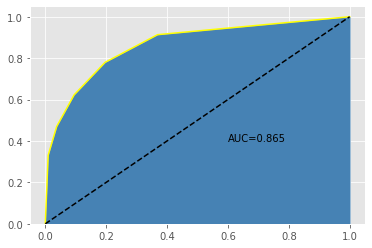

In [29]:
# # 导入模型评估模块
from sklearn import metrics

# 计算ROC曲线的x轴和y轴数据
fpr, tpr, _ = metrics.roc_curve(y_test,  kn.predict_proba(X_test)[:,1])
# 绘制ROC曲线
plt.plot(fpr, tpr, linestyle = 'solid', color = 'yellow')
# 添加阴影
plt.stackplot(fpr, tpr, color = 'steelblue')
# 绘制参考线
plt.plot([0,1],[0,1], linestyle = 'dashed', color = 'black')
# 往图中添加文本
plt.text(0.6,0.4,'AUC=%.3f' % metrics.auc(fpr,tpr))
plt.show()

图中绘制了模型的ROC曲线，经计算得知，该曲线下的面积AUC为0.861。如果使用AUC来评估模型的好坏，那应该希望AUC越大越好。一般而言，当AUC的值超过0.8时，基本上就可以认为模型比较合理。所以，基于默认参数的K近邻模型在居民收入数据集上的表现还算理想。

## 5.2默认的GBDT模型

In [30]:
# 预测测试集
gbdt_pred = gbdt.predict(X_test)
print(pd.crosstab(gbdt_pred, y_test))

income     0     1
row_0             
0       5862   784
1        364  1131


In [31]:
# 模型得分
print('模型在训练集上的准确率%f' %gbdt.score(X_train,y_train))
print('模型在测试集上的准确率%f' %gbdt.score(X_test,y_test))

模型在训练集上的准确率0.869451
模型在测试集上的准确率0.858985


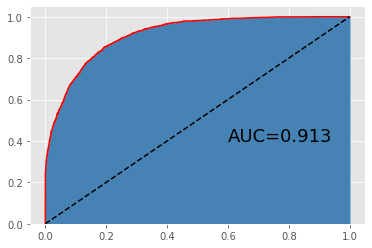

In [32]:
# 绘制ROC曲线
fpr, tpr, _ = metrics.roc_curve(y_test, gbdt.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid', color = 'red')
plt.stackplot(fpr, tpr, color = 'steelblue')
plt.plot([0,1],[0,1], linestyle = 'dashed', color = 'black')
plt.text(0.6,0.4,'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict = dict(size = 18))
plt.show()

如上结果所示，集成算法GBDT在测试集上的表现明显要比K近邻算法优秀，这就是基于多棵决策树进行投票的优点。该模型在训练集和测试集上的表现都非常好，准确率均超过85%，而且AUC值也是前面两种模型中最高的，达到了0.914。

## 5.3 网格搜索的K近邻模型

In [34]:
# 预测测试集
grid_kn_pred = grid_kn.predict(X_test)
print(pd.crosstab(grid_kn_pred, y_test))

income     0     1
row_0             
0       5834   867
1        392  1048


In [35]:
# 模型得分
print('模型在训练集上的准确率%f' %grid_kn.score(X_train,y_train))
print('模型在测试集上的准确率%f' %grid_kn.score(X_test,y_test))

模型在训练集上的准确率0.882473
模型在测试集上的准确率0.845351


比于默认参数的K近邻模型来说，经过网格搜索后的模型在训练数据集上的准确率下降了，但在测试数据集上的准确率提高了，这也是我们所期望的，说明优化后的模型在预测效果上更加优秀，并且两者差异的缩小也能够降低模型过拟合的可能。

In [ ]:
grid_kn.predict_proba(X_test)

In [ ]:
# 绘制ROC曲线
fpr, tpr, _ = metrics.roc_curve(y_test, grid_kn.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid', color = 'red')
plt.stackplot(fpr, tpr, color = 'steelblue')
plt.plot([0,1],[0,1], linestyle = 'dashed', color = 'black')
plt.text(0.6,0.4,'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict = dict(size = 18))
plt.show()

再来看看ROC曲线下的面积，网格搜索后的K近邻模型所对应的AUC为0.867，相比于原先的KNN模型提高了一点。所以，从模型的稳定性来看，网格搜索后的K近邻模型比原始的K近邻模型更加优秀。

## 5.4 网格搜索的GBDT模型

In [ ]:
# 预测测试集
grid_gbdt_pred = grid_gbdt.predict(X_test)
print(pd.crosstab(grid_gbdt_pred, y_test))

# 模型得分
print('模型在训练集上的准确率%f' %grid_gbdt.score(X_train,y_train))
print('模型在测试集上的准确率%f' %grid_gbdt.score(X_test,y_test))

# 绘制ROC曲线
fpr, tpr, _ = metrics.roc_curve(y_test, grid_gbdt_pred)
plt.plot(fpr, tpr, linestyle = 'solid', color = 'red')
plt.stackplot(fpr, tpr, color = 'steelblue')
plt.plot([0,1],[0,1], linestyle = 'dashed', color = 'black')
plt.text(0.6,0.4,'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict = dict(size = 18))
plt.show()

# 总结

不论是K近邻模型，还是梯度提升树GBDT模型，都可以通过网格搜索法找到各自的最佳模型参数，而且这些最佳参数的组合一般都会使模型比较优秀和健壮。所以，纵向比较默认参数的模型和网格搜索后的最佳参数模型，后者可能是比较好的选择（尽管后者可能会花费更多的运行时间）；横向比较单一模型和集成模型，集成模型一般会比单一模型表现优秀。

# Grid Search网格搜索

## 什么是Grid Search 网格搜索？
### Grid Search：一种调参手段；穷举搜索：在所有候选的参数选择中，通过循环遍历，尝试每一种可能性，表现最好的参数就是最终的结果。其原理就像是在数组里找最大值。（为什么叫网格搜索？以有两个参数的模型为例，参数a有3种可能，参数b有4种可能，把所有可能性列出来，可以表示成一个3*4的表格，其中每个cell就是一个网格，循环过程就像是在每个网格里遍历、搜索，所以叫grid search）


## Simple Grid Search：简单的网格搜索

In [2]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)
print("Size of training set:{} size of testing set:{}".format(X_train.shape[0],X_test.shape[0]))

####   grid search start
best_score = 0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C)#对于每种参数可能的组合，进行一次训练；
        svm.fit(X_train,y_train)
        score = svm.score(X_test,y_test)
        if score > best_score:#找到表现最好的参数
            best_score = score
            best_parameters = {'gamma':gamma,'C':C}
####   grid search end

print("Best score:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

Size of training set:112 size of testing set:38
Best score:0.97
Best parameters:{'gamma': 0.001, 'C': 100}


## 存在的问题：
### 原始数据集划分成训练集和测试集以后，其中测试集除了用作调整参数，也用来测量模型的好坏；这样做导致最终的评分结果比实际效果要好。（因为测试集在调参过程中，送到了模型里，而我们的目的是将训练模型应用在unseen data上）；


## 解决方法：
### 对训练集再进行一次划分，分成训练集和验证集，这样划分的结果就是：原始数据划分为3份，分别为：训练集、验证集和测试集；其中训练集用来模型训练，验证集用来调整参数，而测试集用来衡量模型表现好坏。


In [3]:
iris = load_iris()
X_trainval,X_test,y_trainval,y_test = train_test_split(iris.data,iris.target,random_state=0)
X_train,X_val,y_train,y_val = train_test_split(X_trainval,y_trainval,random_state=1)
print("Size of training set:{} size of validation set:{} size of teseting set:{}".format(X_train.shape[0],X_val.shape[0],X_test.shape[0]))

best_score = 0.0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score = svm.score(X_val,y_val)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma':gamma,'C':C}
svm = SVC(**best_parameters) #使用最佳参数，构建新的模型
svm.fit(X_trainval,y_trainval) #使用训练集和验证集进行训练，more data always results in good performance.
test_score = svm.score(X_test,y_test) # evaluation模型评估
print("Best score on validation set:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))
print("Best score on test set:{:.2f}".format(test_score))

Size of training set:84 size of validation set:28 size of teseting set:38
Best score on validation set:0.96
Best parameters:{'gamma': 0.001, 'C': 10}
Best score on test set:0.92


### 然而，这种间接的grid search方法，其最终的表现好坏与初始数据的划分结果有很大的关系，为了处理这种情况，我们采用交叉验证的方式来减少偶然性。

In [4]:
from sklearn.model_selection import cross_val_score

best_score = 0.0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C)
        scores = cross_val_score(svm,X_trainval,y_trainval,cv=5) #5折交叉验证
        score = scores.mean() #取平均数
        if score > best_score:
            best_score = score
            best_parameters = {"gamma":gamma,"C":C}
svm = SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)
test_score = svm.score(X_test,y_test)
print("Best score on validation set:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))
print("Score on testing set:{:.2f}".format(test_score))

Best score on validation set:0.97
Best parameters:{'gamma': 0.1, 'C': 10}
Score on testing set:0.97


### 交叉验证经常与网格搜索进行结合，作为参数评价的一种方法，这种方法叫做grid search with cross validation。sklearn因此设计了一个这样的类GridSearchCV，这个类实现了fit，predict，score等方法，被当做了一个estimator，使用fit方法，该过程中：（1）搜索到最佳参数；（2）实例化了一个最佳参数的estimator；



In [5]:
from sklearn.model_selection import GridSearchCV

#把要调整的参数以及其候选值 列出来；
param_grid = {"gamma":[0.001,0.01,0.1,1,10,100],
             "C":[0.001,0.01,0.1,1,10,100]}
print("Parameters:{}".format(param_grid))

grid_search = GridSearchCV(SVC(),param_grid,cv=5) #实例化一个GridSearchCV类
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=10)
grid_search.fit(X_train,y_train) #训练，找到最优的参数，同时使用最优的参数实例化一个新的SVC estimator。
print("Test set score:{:.2f}".format(grid_search.score(X_test,y_test)))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best score on train set:{:.2f}".format(grid_search.best_score_))

Parameters:{'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
Test set score:0.97
Best parameters:{'C': 10, 'gamma': 0.1}
Best score on train set:0.98


### Grid Search 调参方法存在的共性弊端就是：耗时；参数越多，候选值越多，耗费时间越长！所以，一般情况下，先定一个大范围，然后再细化。
### Grid Search：一种调优方法，在参数列表中进行穷举搜索，对每种情况进行训练，找到最优的参数；由此可知，这种方法的主要缺点是 比较耗时！